In [2]:
import numpy as np
import pandas as pd
import seaborn
import csv
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

abstract_narrative_understanding
Score Test:0.062119279771153835
RMSE: 0.2560554140574557
MAPE: 57318807260262.0


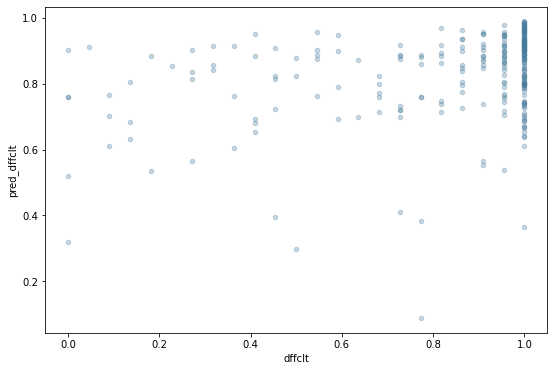

                       0
vocabulary      0.129937
uncertainty     0.126101
reasoning       0.108178
theory of mind  0.096046
anaphora        0.090474
time            0.089050
modality        0.088396
negation        0.074803
composition     0.074425
space           0.074123
noise           0.048466


epistemic_reasoning
Score Test:0.899735163429358
RMSE: 0.05151116061696209
MAPE: 0.09681338573385026


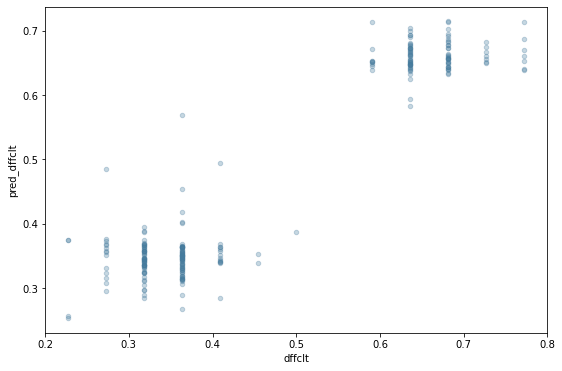

                       0
uncertainty     0.879821
modality        0.038865
vocabulary      0.028305
space           0.016220
theory of mind  0.011099
reasoning       0.008438
anaphora        0.006563
composition     0.004429
noise           0.003620
time            0.001756
negation        0.000884


formal_fallacies_syllogisms_negation
Score Test:0.5865449540827257
RMSE: 0.1022918700519206
MAPE: 0.19138721559674876


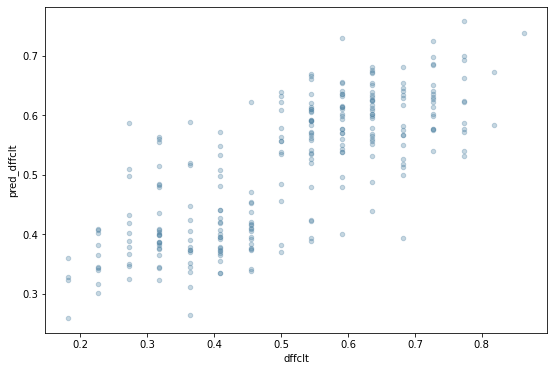

                       0
uncertainty     0.319462
vocabulary      0.313945
theory of mind  0.091329
negation        0.057667
reasoning       0.048751
modality        0.047846
composition     0.040867
anaphora        0.037105
time            0.020694
noise           0.017188
space           0.005148




In [4]:
tasks = ["mmlu_computer_security","mmlu_us_foreign_policy","mmlu_college_chemistry","lsat_qa","legal_support",
         "openbookqa","bbq","hellaswag","truthfulqa","mmlu_econometrics"]

bigbench = ["abstract_narrative_understanding","epistemic_reasoning","formal_fallacies_syllogisms_negation"]

# tasks = bigbench

RMSES = []
MAPES = []

for task in tasks:
    benchmark = 'bigbench' #or helm
    data = pd.read_csv(f'./{benchmark}/{task}/{task}_features_post.csv')
    del data["sentence"]
    #Drop targets or target_values
    data = data.drop(data[data['level_ID'] == 2].index)
    #Agrupar por instancia
    df_grouped = data.groupby('instance_ID').mean()

    df2 = pd.read_csv(f'./{benchmark}/{task}/{task}.csv',usecols=["instance_ID","correct"])
    
    df2_grouped = df2.groupby('instance_ID').mean()

    df = pd.concat([df_grouped, df2_grouped],axis=1, join='outer')
    del df["level_ID"]
    del df["sentence_ID"]
    df=df.rename(columns = {'correct':'Dffclt'})
    df["Dffclt"] = 1 - df["Dffclt"]


    #Prepare train and test data
    X = df.drop(['Dffclt'], axis = 1)
    y = df['Dffclt']
    training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)


    clf=RandomForestRegressor()
    clf.fit(training, training_labels)

    preds = clf.predict(testing)

    print(task)
    print("Score Test:" + str(clf.score(testing,testing_labels)))
    rmse = mean_squared_error(testing_labels,preds,squared=False)
    print("RMSE: " + str(rmse))
    RMSES.append(rmse)
    mape = mean_absolute_percentage_error(testing_labels,preds)
    print("MAPE: " + str(mape))
    MAPES.append(mape)

    diff = pd.DataFrame(columns=['dffclt','pred_dffclt'])

    # assign the array to the column
    diff['pred_dffclt'] = preds
    diff['dffclt'] = testing_labels.to_numpy()

    diff.plot(kind='scatter', x='dffclt', y='pred_dffclt',figsize=(9,6),color='#457B9D',alpha=0.3)
#     plt.savefig(f'./{benchmark}/{task}/{task}_rf_noIRT_difficulty_notargets.pdf')
    plt.show()
    
    importance = pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)
#     importance.to_csv(f'./{benchmark}/{task}/rf_noIRT_difficulty_feature_importance.csv')
    print(importance)
    print("\n")
    

'l'